In [2]:
from util.util import load_curves, load_log

# Load Data
n = [100, 500, 1000, 1500, 2000]
m = [1, 2, 5, 7, 10]
st = [1, 1, 2, 3, 5]
data = {}

for _n in n:
    for _mIdx in range(len(m)):
        folder_name = f"../result/price_curve_{st[_mIdx]}_{m[_mIdx]}_{_n}"
        local_curves, onchain_curve, average_of_local_curves = load_curves(folder_name)
        log = load_log(f"{folder_name}/logs.json")
        data[f"{st[_mIdx]}_{m[_mIdx]}_{_n}"] = {
            "local_curves": local_curves,
            "onchain_curve": onchain_curve,
            "avg_local_curves": average_of_local_curves,
            "log": {
                **log,
                "Gas": log["AliceGas"]
                + log["SuperMatcherGas"]
                + log["ReporterGas"]
                + log["WorkerGas"]
                + log["MatcherGas"],
            },
        }
        
clob_data = {}
for _n in n:
    log = load_log(f"../clob_onchain/logs_{_n}.json")
    clob_data[f"{_n}"] = log

### FIX No Order, CHANGE No Matcher & No Send-To (1/2 Matcher)

#### Gas

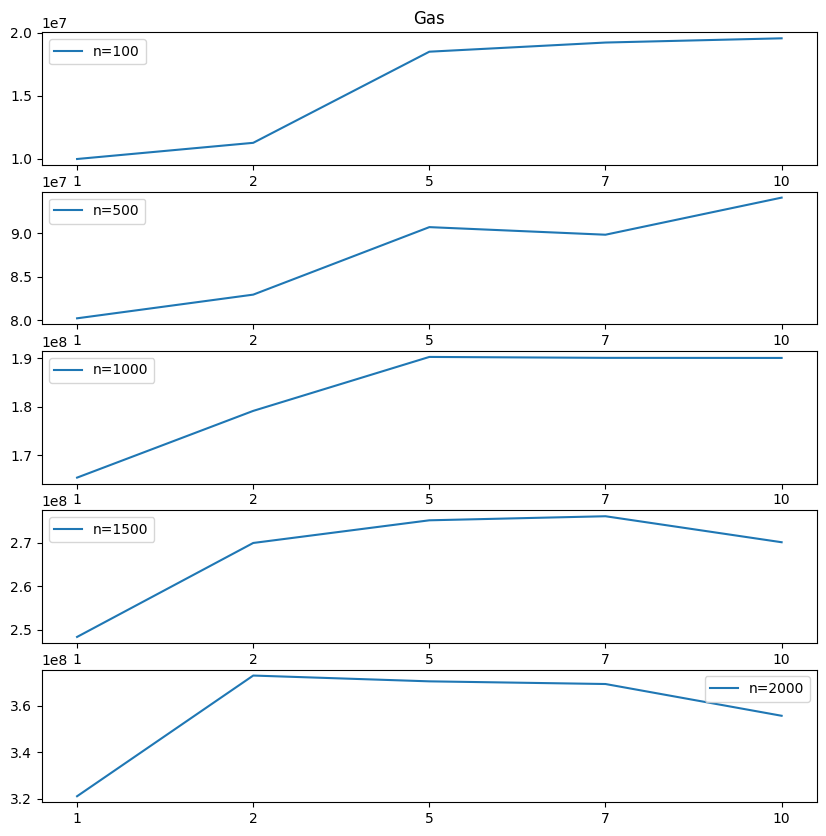

In [3]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 10))
for i, _n in enumerate(n):
    axes[i].plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["Gas"] for _m in m],
        label=f"n={_n}",
    )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].legend()
axes[0].set_title('Gas')
plt.legend()
plt.show()

#### Time

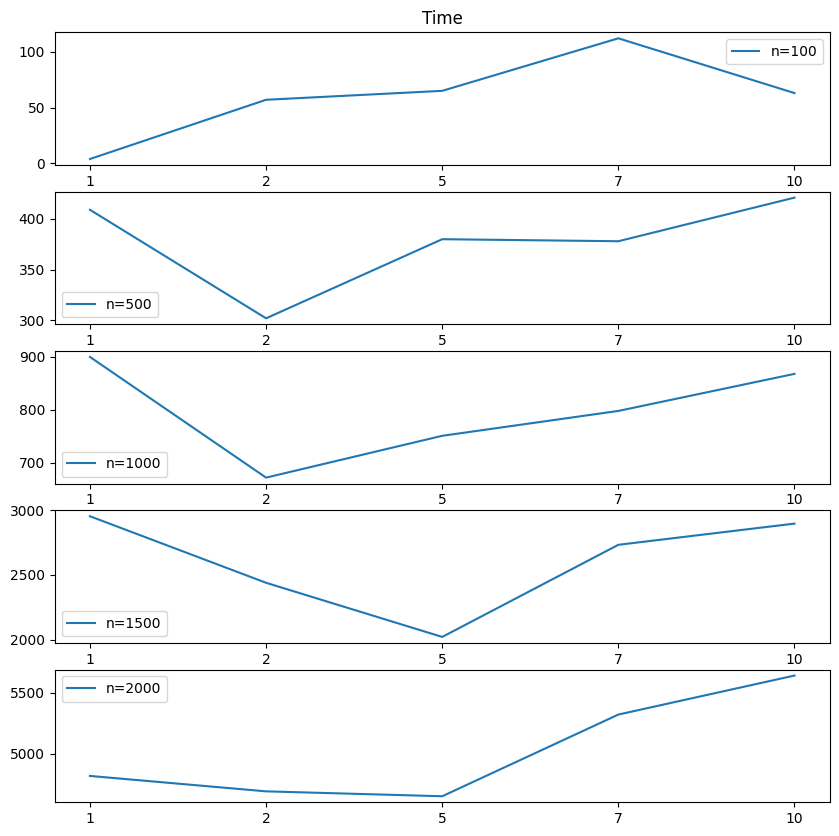

In [4]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 10))
for i, _n in enumerate(n):
    axes[i].plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
            + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]
            for _m in m
        ],
        label=f"n={_n}",
    )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].legend()
axes[0].set_title("Time")
plt.legend()
plt.show()

#### Amount

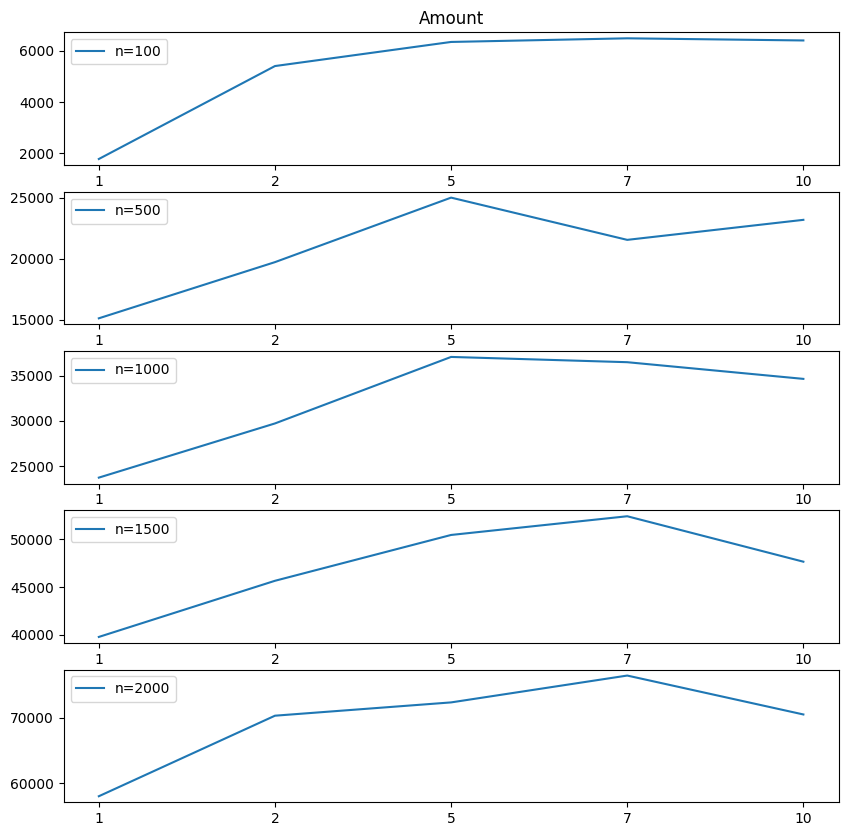

In [5]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 10))
for i, _n in enumerate(n):
    axes[i].plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchedAmount"]
            + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchedAmount"]
            for _m in m
        ],
        label=f"n={_n}",
    )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].legend()
axes[0].set_title("Amount")
plt.legend()
plt.show()

### FIX No Matcher & No Send-To (1/2 Matcher), CHANGE No Order

#### Gas

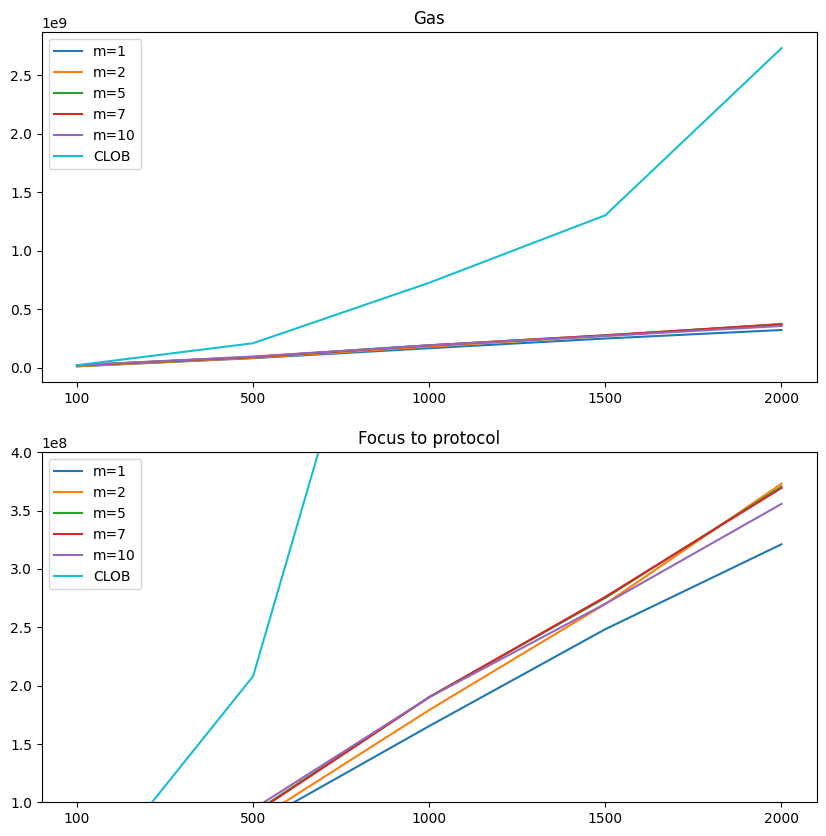

In [6]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
for i, _m in enumerate(m):
    for j in [0, 1]:
        axes[j].plot(
            [
                data[f"{st[i]}_{_m}_{_n}"]["log"]["Gas"]
                for _n in n
            ],
            label=f"m={_m}",
            color=colors[i % len(colors)], 
        )
# CLOB
_clob = [clob_data[f"{_n}"]["Gas"] for _n in n]
axes[0].plot(_clob, label="CLOB", color=colors[-1])
axes[0].set_xticks(idx)
axes[0].set_xticklabels(n)
axes[0].set_title("Gas")
axes[0].legend()
    
axes[1].plot(_clob, label="CLOB", color=colors[-1])
axes[1].set_xticks(idx)
axes[1].set_xticklabels(n)
axes[1].set_title("Focus to protocol")
axes[1].legend()
axes[1].set_ylim(10**8, 4*10**8)
plt.show()

#### Time

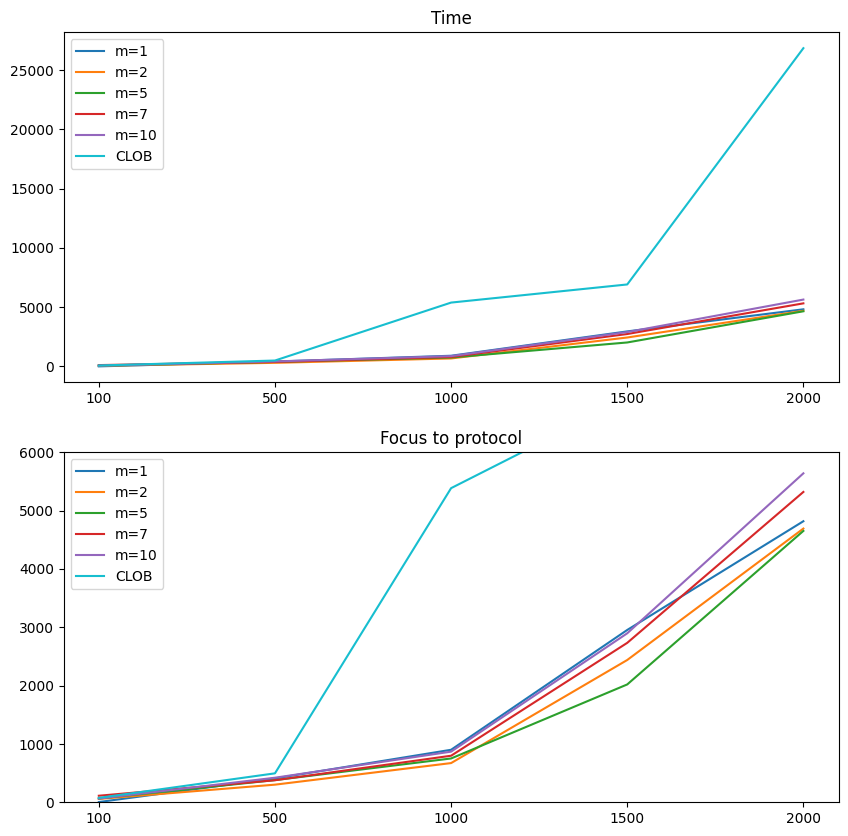

In [7]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors =plt.cm.tab10.colors 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
for i, _m in enumerate(m):
    for j in [0, 1]:
        axes[j].plot(
            [
                data[f"{st[i]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
                + data[f"{st[i]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]
                for _n in n
            ],
            label=f"m={_m}",
            color=colors[i % len(colors)], 
        )
# CLOB
_clob = [clob_data[f"{_n}"]["Time"]  for _n in n]
axes[0].plot(_clob, label="CLOB", color=colors[-1])
axes[0].set_xticks(idx)
axes[0].set_xticklabels(n)
axes[0].set_title("Time")
axes[0].legend()

axes[1].plot(_clob, label="CLOB", color=colors[-1])
axes[1].set_xticks(idx)
axes[1].set_xticklabels(n)
axes[1].set_title("Focus to protocol")
axes[1].set_ylim(0, 6000)
axes[1].legend()
    
plt.show()

#### Amount

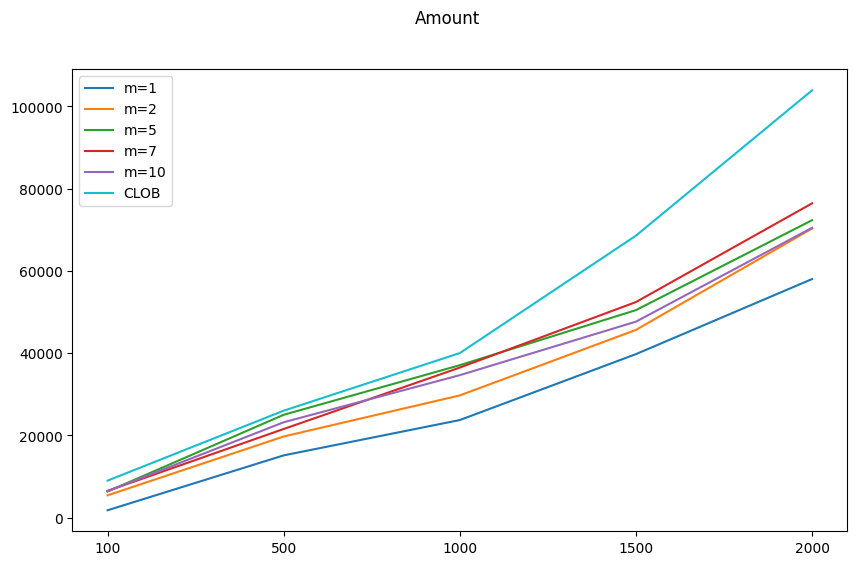

In [8]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(10, 6))
for i, _m in enumerate(m):
    ax.plot(
        [
            data[f"{st[i]}_{_m}_{_n}"]["log"]["LocalMatchedAmount"]
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["OnchainMatchedAmount"]
            for _n in n
        ],
        label=f"m={_m}",
        color=colors[i % len(colors)],
    )
# CLOB
_clob = [clob_data[f"{_n}"]["Amount"] for _n in n]
ax.plot(_clob, label="CLOB", color=colors[-1])

ax.set_xticks(idx)
ax.set_xticklabels(n)
ax.legend()
fig.suptitle("Amount")
plt.show()